# Assignment 2 -Predicting Daibetes using Single layer Perceptron

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, recall_score,
    precision_score, roc_auc_score, f1_score, confusion_matrix, classification_report
)
from sklearn.impute import SimpleImputer

from sklearn.model_selection import ParameterGrid

import seaborn as sns

# Loading the Dataset

In [ ]:
# Loading the diabetes dataset
data= pd.read_csv("/content/diabetes.csv")

In [ ]:
#Displaying the first few rows of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Displaying  summary of statistics of dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data visualization method

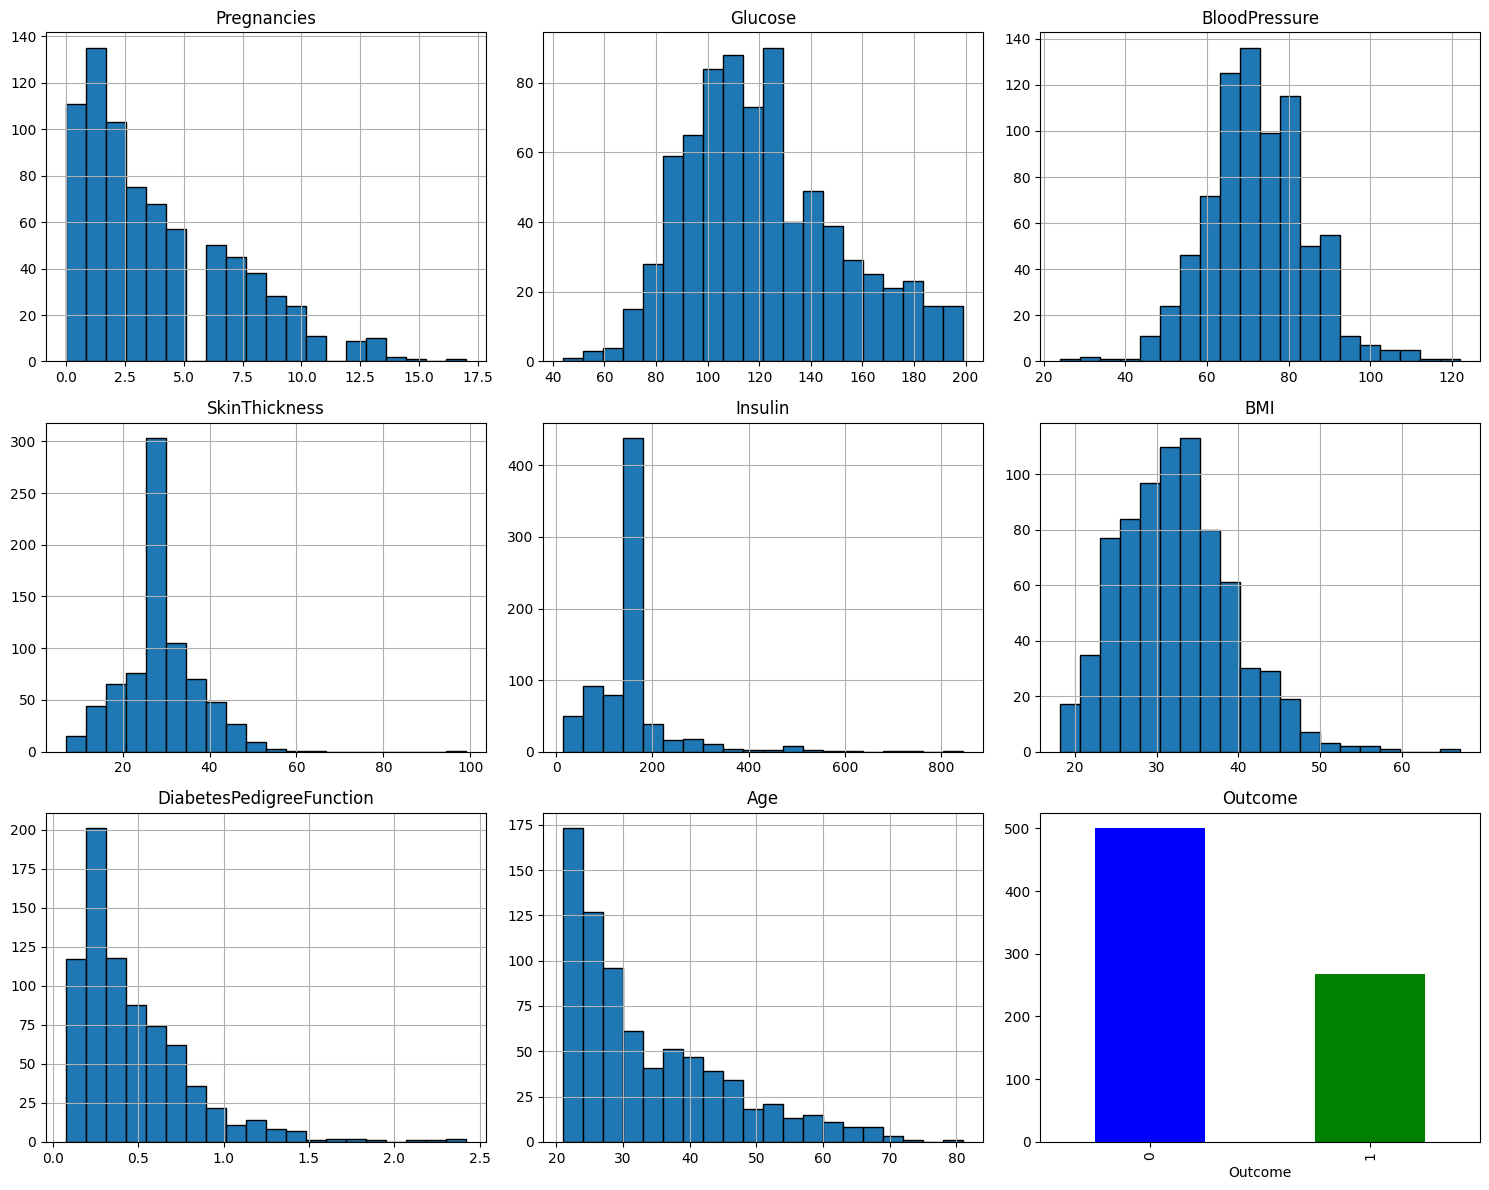

In [75]:
import matplotlib.pyplot as plt

# Set up the figure size and layout for the histograms
plt.figure(figsize=(15, 12))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    data[column].hist(bins=20, edgecolor='black')
    plt.title(column)

# Plot the bar chart for the Outcome variable
plt.subplot(3, 3, 9)
data['Outcome'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Outcome')

plt.tight_layout()
plt.show()


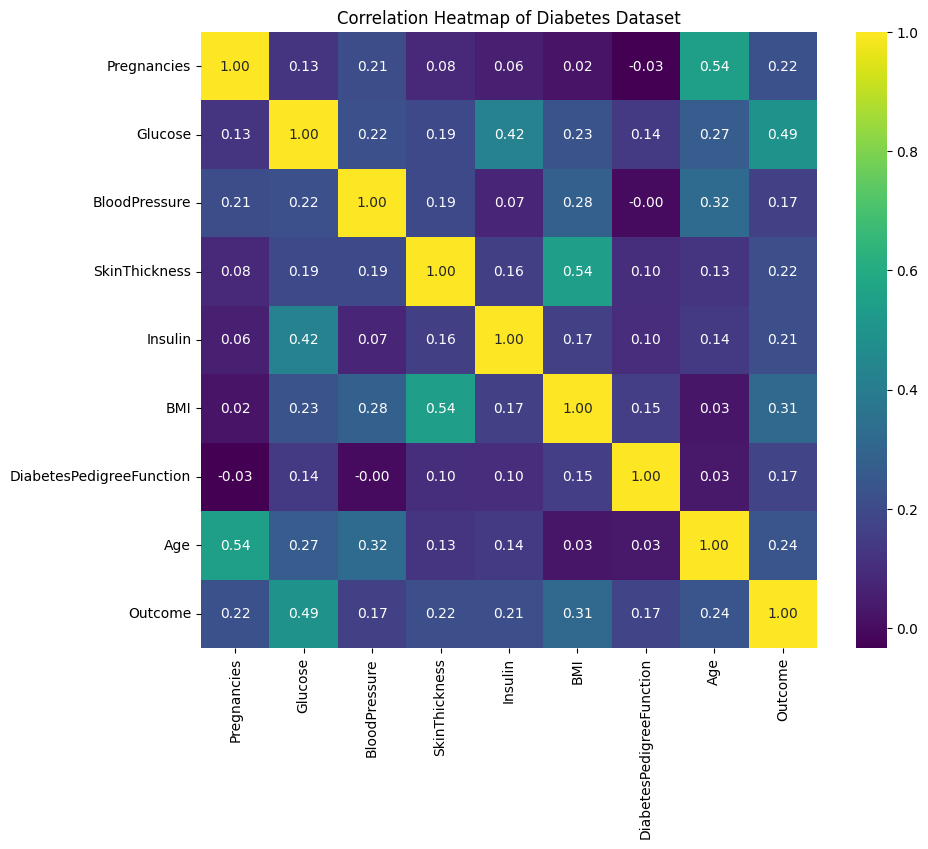

In [72]:
# Recompute the correlation matrix and attempt to generate the heatmap again
corr = data.corr()

# Set up the matplotlib figure again
plt.figure(figsize=(10, 8))

# Generate a heatmap again
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True)

# Show the plot
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()


# Data preprocessing

In [ ]:
cols_with_missing_vals = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_missing_vals] = data[cols_with_missing_vals].replace(0, np.nan)

# Impute the missing values with the mean of the respective column
data.fillna (data.mean(), inplace=True)

# Check if there are any remaining missing values
print(data.isnull().sum())




Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Number of cases:
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage of cases:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


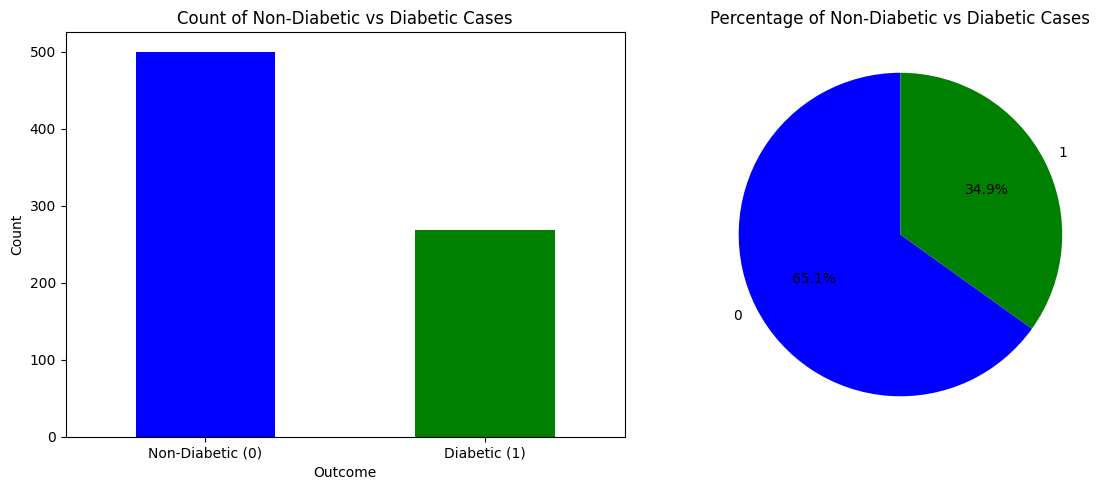

In [67]:
import pandas as pd

# Load the diabetes dataset (assuming it's already loaded as diabetes_data)
# diabetes_data = pd.read_csv('path_to_your_diabetes.csv')

# Count the number of non-diabetic (0) and diabetic (1) cases
outcome_counts = data['Outcome'].value_counts()

# Calculate the percentage of each outcome
outcome_percentage = data['Outcome'].value_counts(normalize=True) * 100

# Print the results
print("Number of cases:")
print(outcome_counts)
print("\nPercentage of cases:")
print(outcome_percentage)
import matplotlib.pyplot as plt

# Assuming 'diabetes_data' is your DataFrame and has already been loaded

# Count the number of non-diabetic (0) and diabetic (1) cases
outcome_counts = data['Outcome'].value_counts()

# Calculate the percentage of each outcome
outcome_percentage = data['Outcome'].value_counts(normalize=True) * 100

# Plotting the count of cases
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
outcome_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Count of Non-Diabetic vs Diabetic Cases')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'], rotation=0)
# Plotting the percentage of cases
plt.subplot(1, 2, 2)
outcome_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
plt.title('Percentage of Non-Diabetic vs Diabetic Cases')
plt.ylabel('')  # Hide the y-label on the pie chart

plt.tight_layout()
plt.show()

# Measuring the Baseline model(for the training and validation dataset)

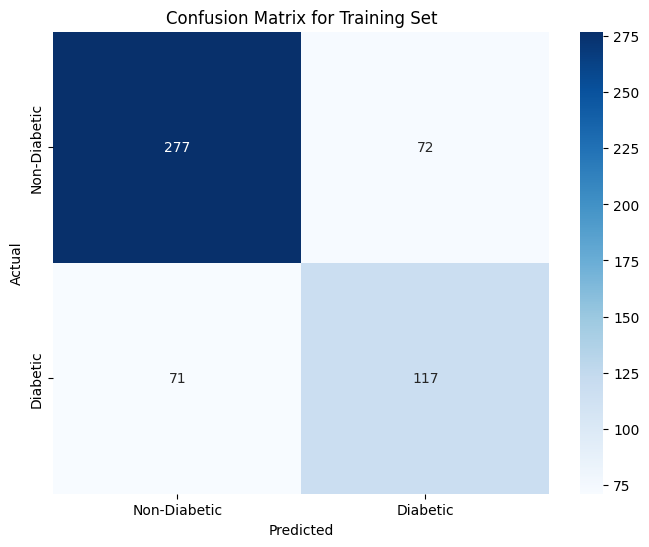

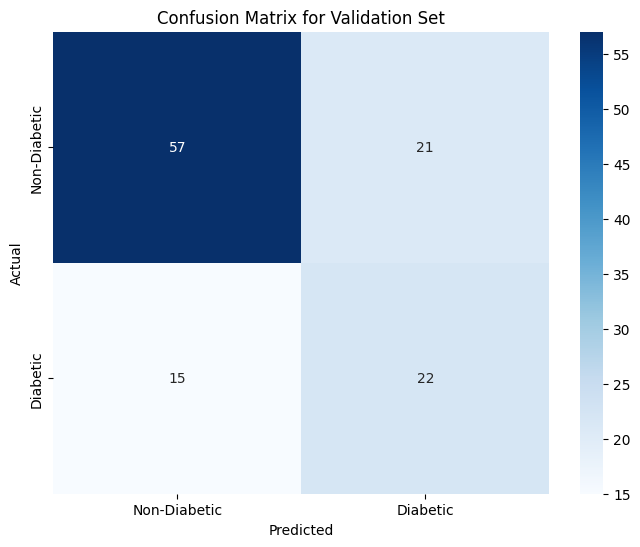

Classification report for training set:
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.79      0.79       349
    Diabetic       0.62      0.62      0.62       188

    accuracy                           0.73       537
   macro avg       0.71      0.71      0.71       537
weighted avg       0.73      0.73      0.73       537


Classification report for validation set:
              precision    recall  f1-score   support

Non-Diabetic       0.79      0.73      0.76        78
    Diabetic       0.51      0.59      0.55        37

    accuracy                           0.69       115
   macro avg       0.65      0.66      0.66       115
weighted avg       0.70      0.69      0.69       115



In [76]:
# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Splitting the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Train the Perceptron model
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)

# Predictions for validation set
y_valid_pred = perceptron.predict(X_valid)

# Confusion Matrix for the validation set
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)

# Generate predictions for the training set
y_train_pred = perceptron.predict(X_train)

# Confusion Matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the confusion matrix for the training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Training Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report for the training set
class_report_train = classification_report(y_train, y_train_pred, target_names=['Non-Diabetic', 'Diabetic'])
# Plotting the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_valid, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report for the validation set
class_report_valid = classification_report(y_valid, y_valid_pred, target_names=['Non-Diabetic', 'Diabetic'])

# Printing classification reports
print("Classification report for training set:")
print(class_report_train)

print("\nClassification report for validation set:")
print(class_report_valid)



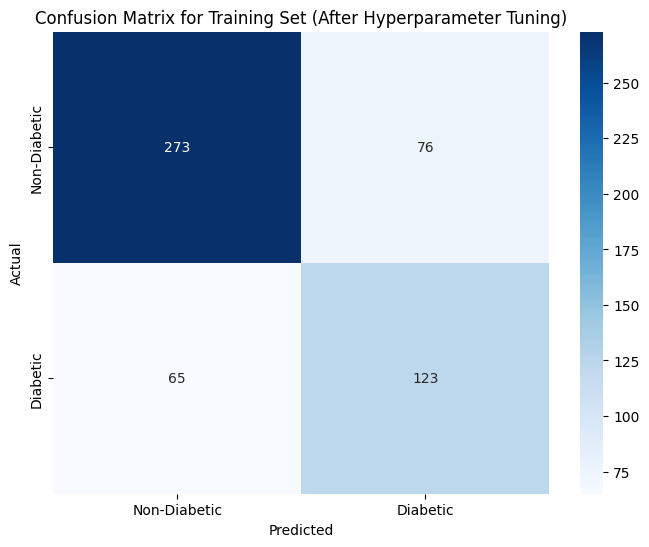

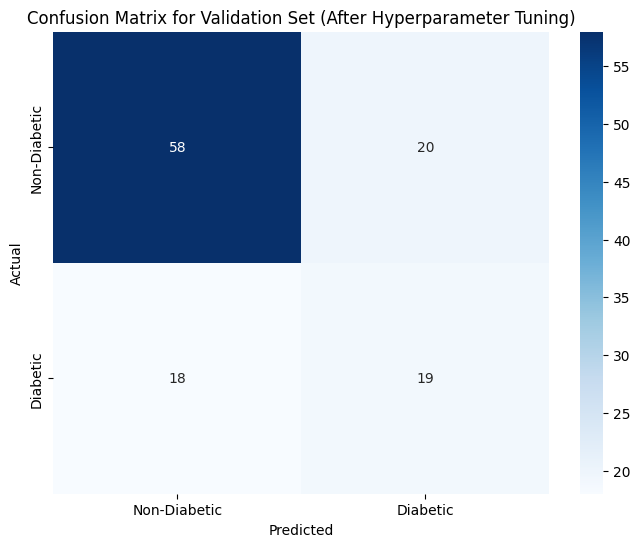

Classification report for training set (After Hyperparameter Tuning):
              precision    recall  f1-score   support

Non-Diabetic       0.81      0.78      0.79       349
    Diabetic       0.62      0.65      0.64       188

    accuracy                           0.74       537
   macro avg       0.71      0.72      0.72       537
weighted avg       0.74      0.74      0.74       537


Classification report for validation set (After Hyperparameter Tuning):
              precision    recall  f1-score   support

Non-Diabetic       0.76      0.74      0.75        78
    Diabetic       0.49      0.51      0.50        37

    accuracy                           0.67       115
   macro avg       0.63      0.63      0.63       115
weighted avg       0.67      0.67      0.67       115

Best hyperparameters: {'alpha': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.0001}


In [78]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 1500, 2000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions for validation set with the best model
y_valid_pred = best_model.predict(X_valid)

# Confusion Matrix for the validation set
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)

# Predictions for the training set with the best model
y_train_pred = best_model.predict(X_train)

# Confusion Matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plotting the confusion matrix for the training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Training Set (After Hyperparameter Tuning)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report for the training set
class_report_train = classification_report(y_train, y_train_pred, target_names=['Non-Diabetic', 'Diabetic'])

# Plotting the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_valid, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Validation Set (After Hyperparameter Tuning)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report for the validation set
class_report_valid = classification_report(y_valid, y_valid_pred, target_names=['Non-Diabetic', 'Diabetic'])

# Printing classification reports
print("Classification report for training set (After Hyperparameter Tuning):")
print(class_report_train)

print("\nClassification report for validation set (After Hyperparameter Tuning):")
print(class_report_valid)

# Print the best hyperparameters
print("Best hyperparameters:", best_params)


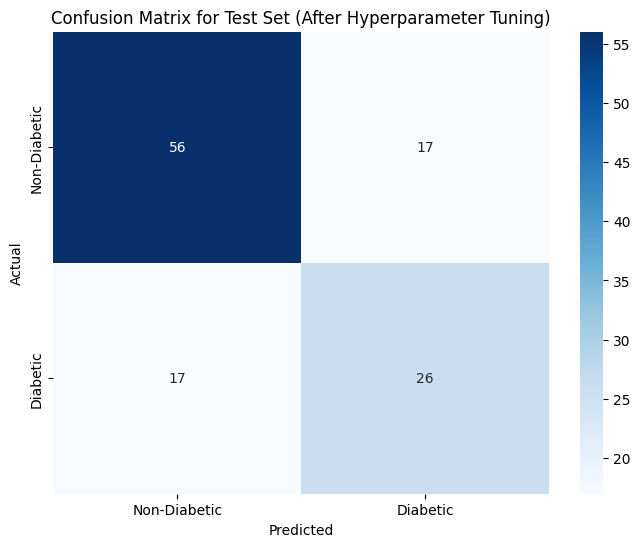

Classification report for test set (After Hyperparameter Tuning):
              precision    recall  f1-score   support

Non-Diabetic       0.77      0.77      0.77        73
    Diabetic       0.60      0.60      0.60        43

    accuracy                           0.71       116
   macro avg       0.69      0.69      0.69       116
weighted avg       0.71      0.71      0.71       116

Test Accuracy: 0.71


In [79]:
# After performing the grid search, best_model contains the tuned model

# Predictions for test set with the best model
y_test_pred = best_model.predict(X_test)

# Confusion Matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Classification report for the test set
class_report_test = classification_report(y_test, y_test_pred, target_names=['Non-Diabetic', 'Diabetic'])

# Plotting the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix for Test Set (After Hyperparameter Tuning)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print classification report for the test set
print("Classification report for test set (After Hyperparameter Tuning):")
print(class_report_test)

# Print the test accuracy
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

